In [54]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df = pd.read_csv("conversion_data.csv")

In [41]:
df.shape

(316200, 6)

In [42]:
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              316200 non-null  object
 1   age                  316200 non-null  int64 
 2   new_user             316200 non-null  int64 
 3   source               316200 non-null  object
 4   total_pages_visited  316200 non-null  int64 
 5   converted            316200 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [44]:
df.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [45]:
for column in df.columns:
    uniques = sorted(df[column].unique())
    clean_uniques = [int(x) if hasattr(x, 'dtype') and 'int' in str(x.dtype) else x for x in uniques]
    print('{0:20s} {1:5d}\t'.format(column, len(uniques)), clean_uniques[:5])

country                  4	 ['China', 'Germany', 'UK', 'US']
age                     60	 [17, 18, 19, 20, 21]
new_user                 2	 [0, 1]
source                   3	 ['Ads', 'Direct', 'Seo']
total_pages_visited     29	 [1, 2, 3, 4, 5]
converted                2	 [0, 1]


In [46]:
df['converted'].value_counts()

converted
0    306000
1     10200
Name: count, dtype: int64

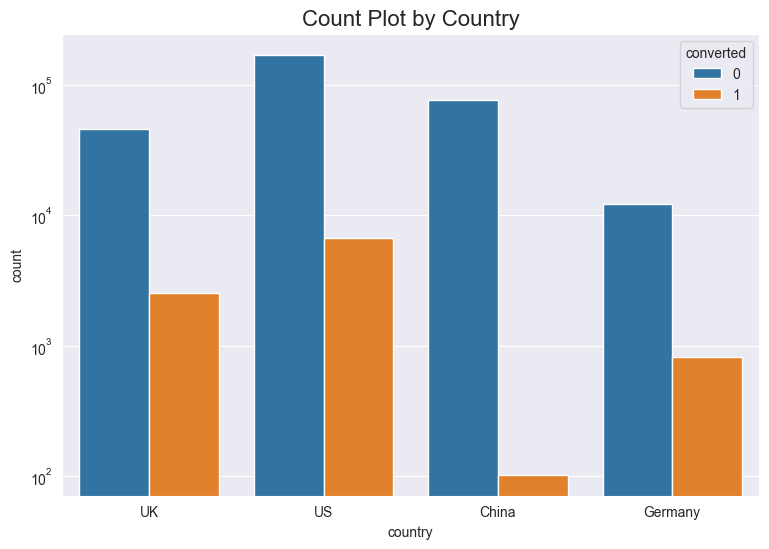

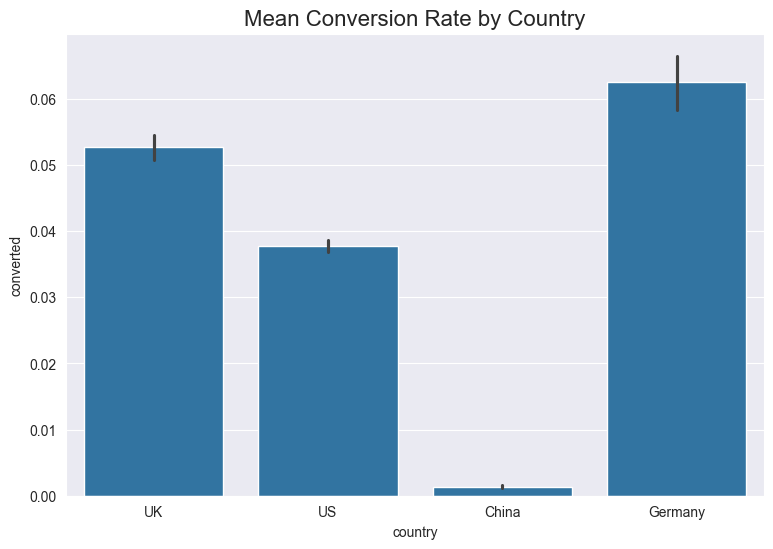

In [47]:
plt.figure(figsize=(9,6))
sns.countplot(x='country', hue='converted', data=df)
plt.title('Count Plot by Country', fontsize=16)
plt.yscale('log')
plt.show()
plt.figure(figsize=(9,6))
sns.barplot(x='country', y='converted', data=df)
plt.title('Mean Conversion Rate by Country', fontsize=16)
plt.show()

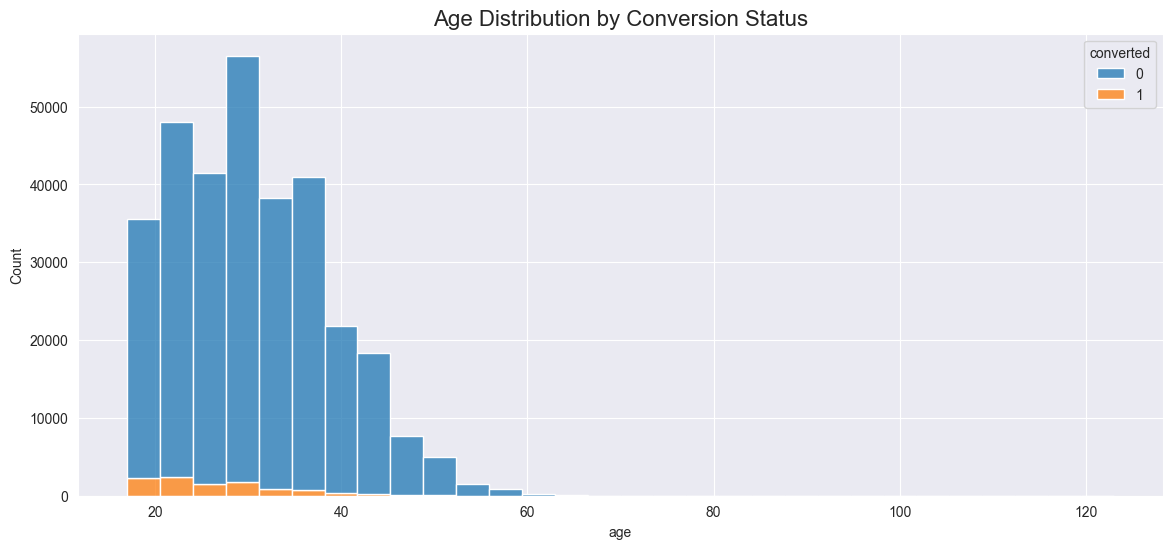

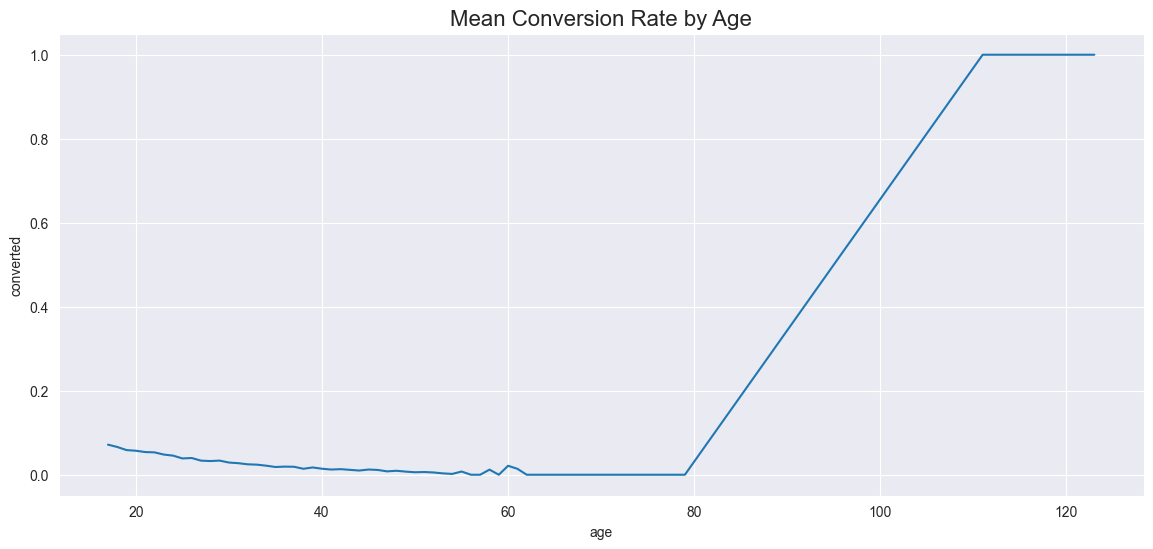

In [48]:
plt.figure(figsize=(14,6))
sns.histplot(df, x='age', hue='converted', multiple='stack', bins=30)
plt.title('Age Distribution by Conversion Status', fontsize=16)
plt.show()
plt.figure(figsize=(14,6))
sns.lineplot(data=df.groupby('age')['converted'].mean().reset_index(), x='age', y='converted')
plt.title('Mean Conversion Rate by Age', fontsize=16)
plt.show()

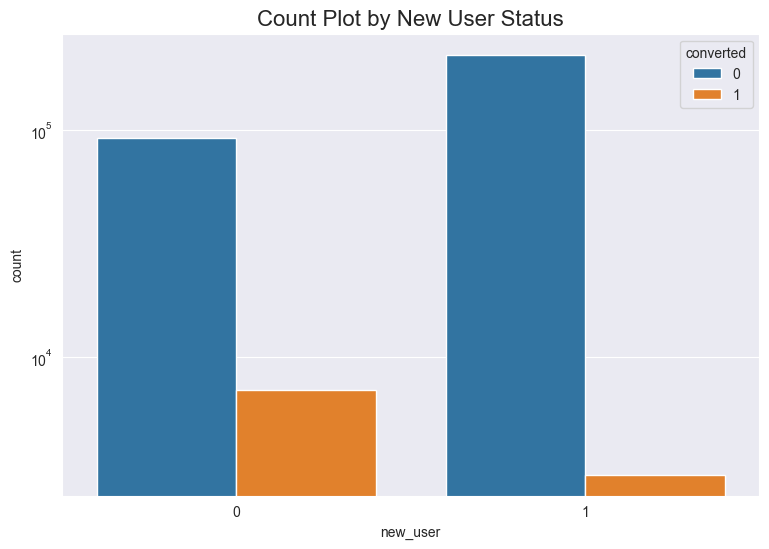

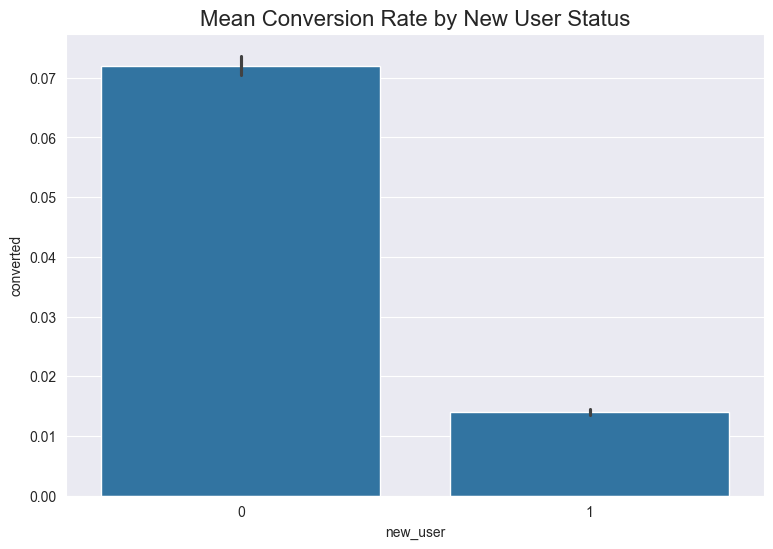

In [49]:
plt.figure(figsize=(9,6))
sns.countplot(x='new_user', hue='converted', data=df)
plt.title('Count Plot by New User Status', fontsize=16)
plt.yscale('log')
plt.show()
plt.figure(figsize=(9,6))
sns.barplot(x='new_user', y='converted', data=df)
plt.title('Mean Conversion Rate by New User Status', fontsize=16)
plt.show()

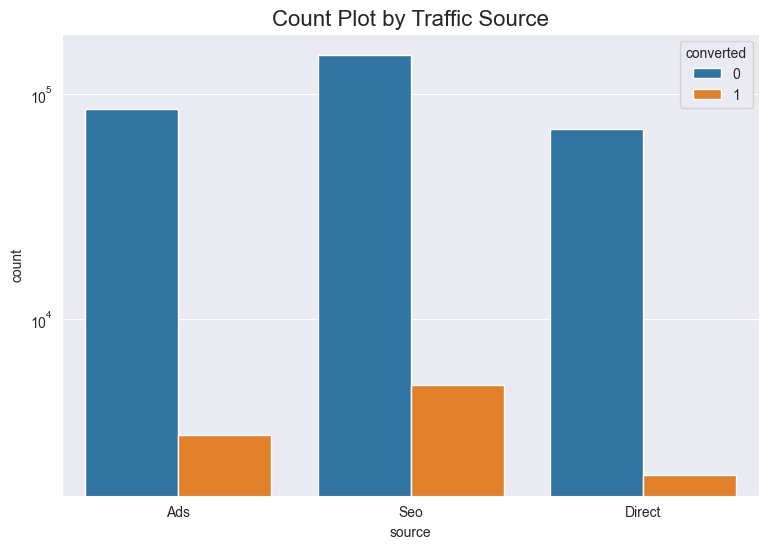

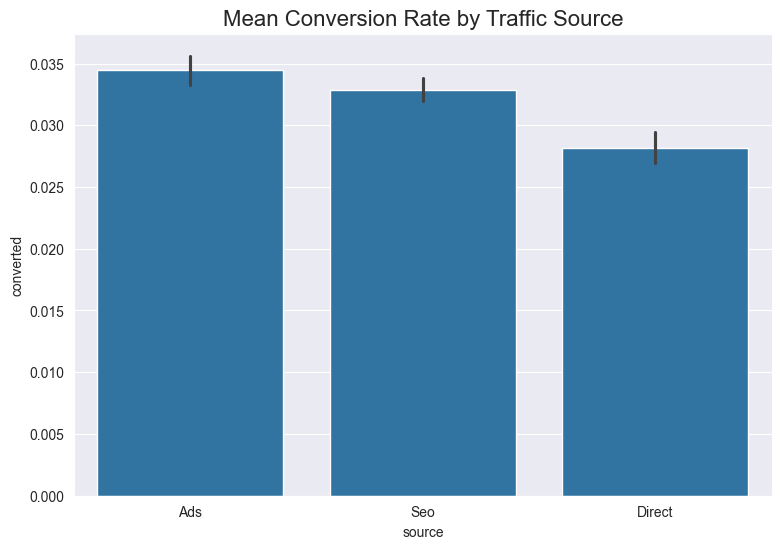

In [50]:
plt.figure(figsize=(9,6))
sns.countplot(x='source', hue='converted', data=df)
plt.title('Count Plot by Traffic Source', fontsize=16)
plt.yscale('log')
plt.show()
plt.figure(figsize=(9,6))
sns.barplot(x='source', y='converted', data=df)
plt.title('Mean Conversion Rate by Traffic Source', fontsize=16)
plt.show()

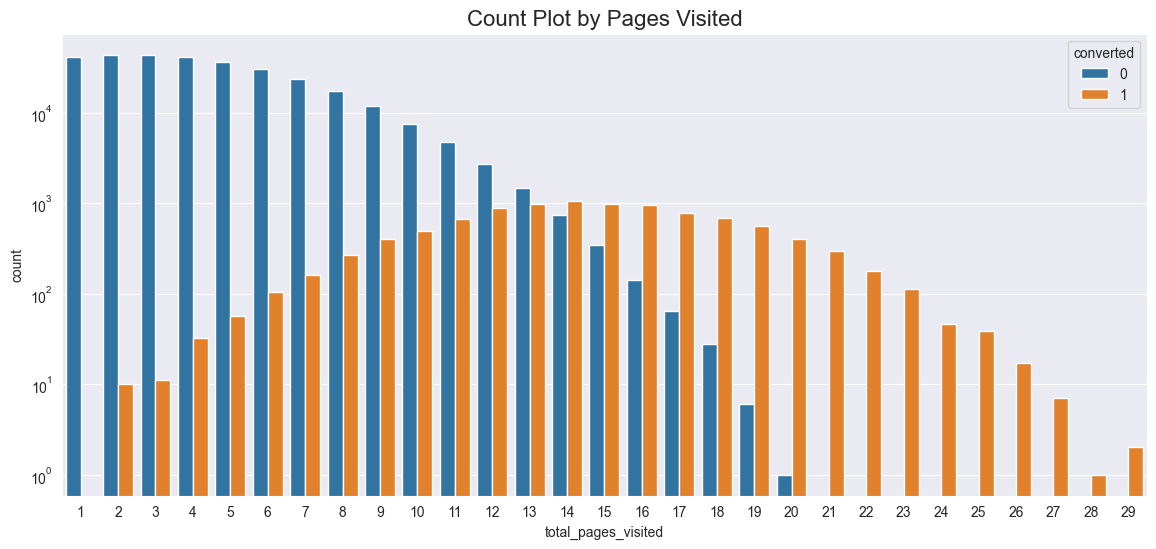

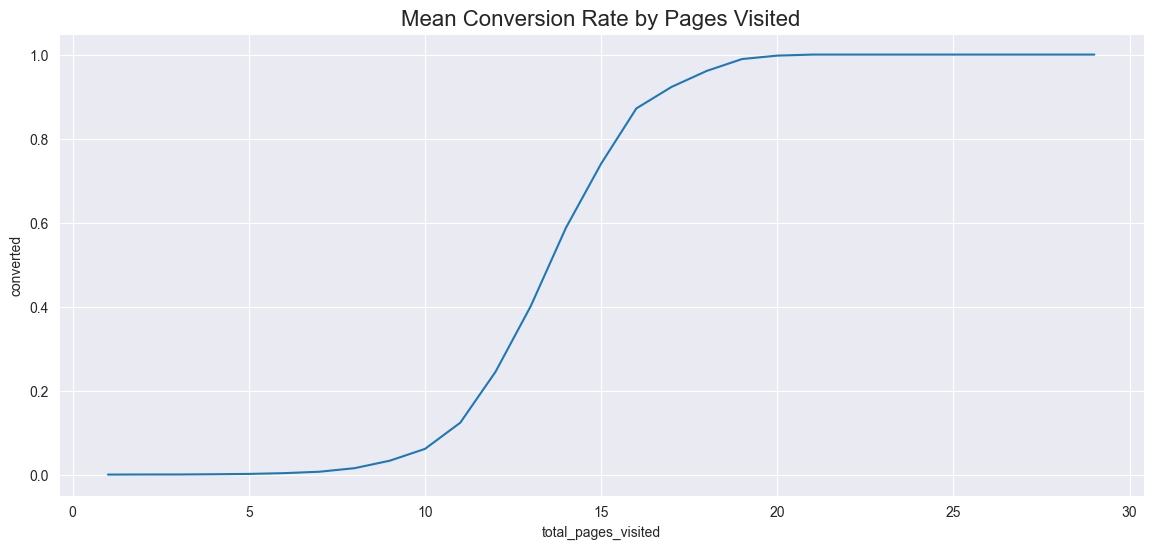

In [51]:
plt.figure(figsize=(14,6))
sns.countplot(x='total_pages_visited', hue='converted', data=df)
plt.title('Count Plot by Pages Visited', fontsize=16)
plt.yscale('log')
plt.show()
plt.figure(figsize=(14,6))
sns.lineplot(data=df.groupby('total_pages_visited')['converted'].mean().reset_index(), x='total_pages_visited', y='converted')
plt.title('Mean Conversion Rate by Pages Visited', fontsize=16)
plt.show()

In [53]:
df['country'] = df['country'].astype(str)
df['source'] = df['source'].astype(str)
df['new_user'] = df['new_user'].astype(str)
df_encoded = pd.get_dummies(df, columns=['country', 'source', 'new_user'], drop_first=False)
df_encoded.head()

,age,total_pages_visited,converted,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo,new_user_0,new_user_1
0,25,1,0,False,False,True,False,True,False,False,False,True
1,23,5,0,False,False,False,True,False,False,True,False,True
2,28,4,0,False,False,False,True,False,False,True,False,True
3,39,5,0,True,False,False,False,False,False,True,False,True
4,30,6,0,False,False,False,True,False,False,True,False,True


In [55]:
X = df_encoded.drop('converted', axis=1)
y = df_encoded['converted']

In [56]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = LogisticRegression(max_iter=1000)
y_pred = cross_val_predict(model, X, y, cv=kf)
y_proba = cross_val_predict(model, X, y, cv=kf, method='predict_proba')[:,1]

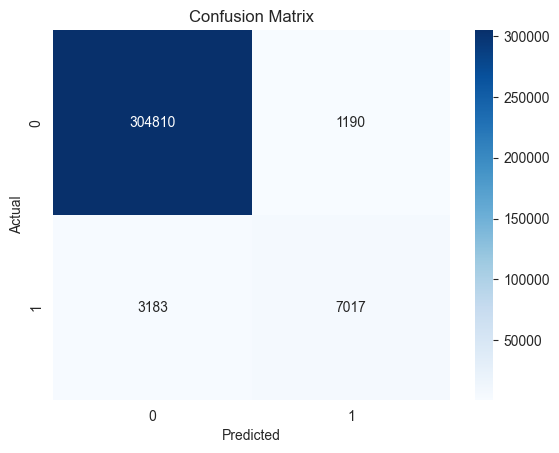

In [57]:
cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [58]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    306000
           1       0.86      0.69      0.76     10200

    accuracy                           0.99    316200
   macro avg       0.92      0.84      0.88    316200
weighted avg       0.99      0.99      0.99    316200



In [59]:
auc = roc_auc_score(y, y_proba)
print("ROC AUC Score:", auc)

ROC AUC Score: 0.9859598140138409


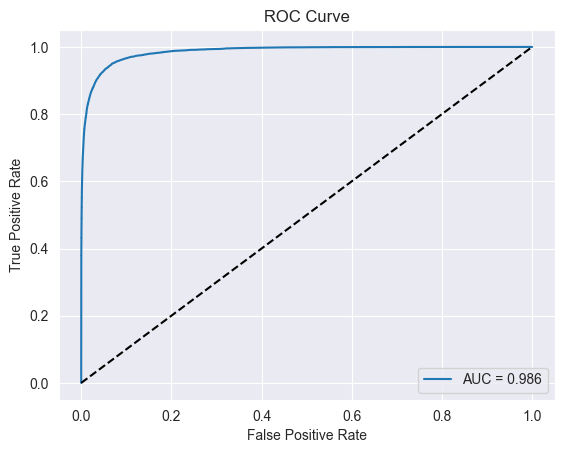

In [60]:
fpr, tpr, _ = roc_curve(y, y_proba)
plt.plot(fpr, tpr, label='AUC = {:.3f}'.format(auc))
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

In [62]:
model = LogisticRegression(max_iter=1000)
model.fit(X, y)
importance = np.abs(model.coef_[0])
lr_df = pd.DataFrame({'feature': X.columns, 'importance': importance}).sort_values(by='importance', ascending=False)

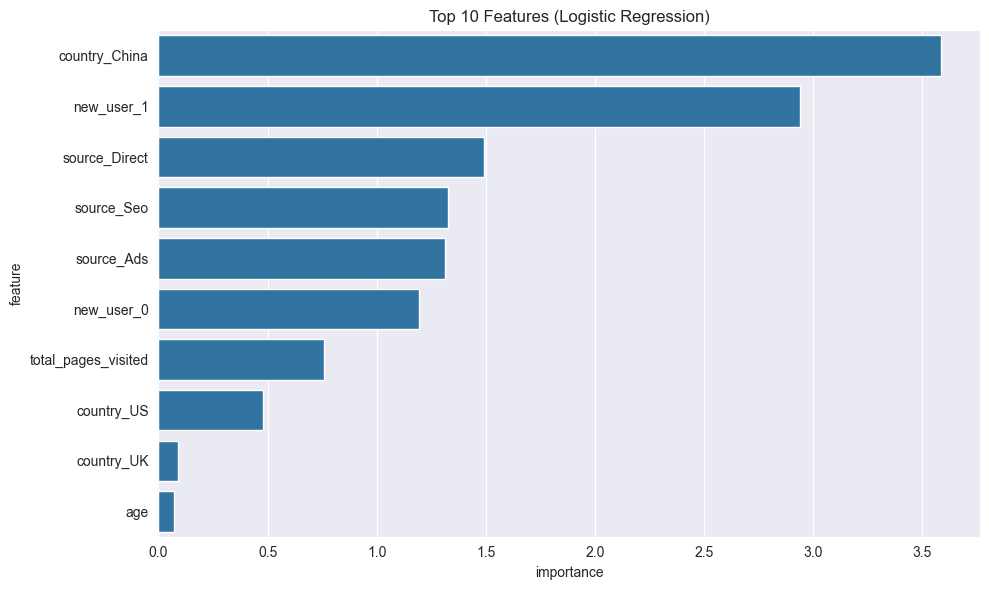

In [63]:
plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=lr_df.head(10))
plt.title('Top 10 Features (Logistic Regression)')
plt.tight_layout()
plt.show()